In [2]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path = '/mnt/data4/Abhishek/WP/'
data = np.load('machine_learning_data.npy')

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [6]:
random_data = []

for filename in os.listdir(path):
    if filename.startswith('wp_galaxies'):
        pos = extractIndex(filename)
        wp,_ = np.load(os.path.join(path,filename))
        #_temp = np.concatenate((wp,f[pos]))
        random_data.append(wp)

In [7]:
full_data = np.vstack((random_data))
full_data = np.hstack((full_data,data))
del random_data
np.random.shuffle(full_data)

## Order is wp (29) VPF (30) CIC(15) CIA(15)

In [12]:
y_data = full_data[:,:-5]
X_data = full_data[:,-5:]

In [13]:
y_data = y_data[:,59:74]  #CIC

In [14]:
y_data.shape

(5000, 15)

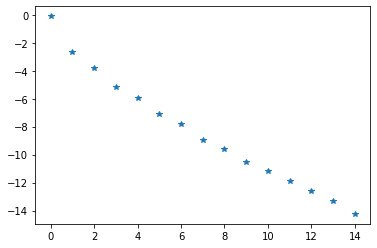

In [15]:
plt.plot(np.arange(y_data.shape[1]),y_data[0],'*')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [17]:
X_train.shape, X_test.shape

((4500, 5), (500, 5))

In [18]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [19]:

err = mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=True)

In [20]:
print (np.mean(((y_rf - y_test)/y_test), axis=0))
np.std(y_rf,axis=0)

[0.0205699  0.00817134 0.00392991 0.00569654 0.00214891 0.00430081
 0.00401833 0.00380941 0.00321383 0.0040248  0.00429106 0.00291648
 0.00307698 0.00378532 0.00490818]


array([0.01476237, 0.12880985, 0.14495341, 0.15333116, 0.14358751,
       0.14242188, 0.13491406, 0.13007509, 0.14169343, 0.15341653,
       0.17292664, 0.18846694, 0.20327123, 0.21254273, 0.18302224])

In [21]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

Text(0.5, 0, 'WP')

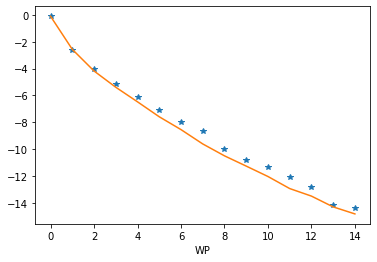

In [22]:
plt.plot(np.arange(y_data.shape[1]),y_test[160,:],'*')
plt.plot(np.arange(y_data.shape[1]),y_rf[160])
plt.xlabel('WP')

Text(0, 0.5, 'CIC_predicted')

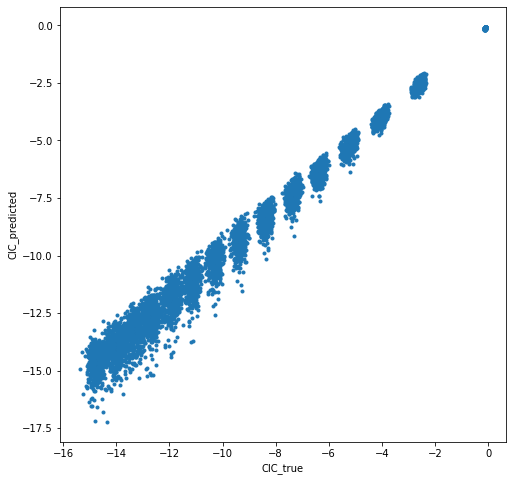

In [24]:
plt.figure(figsize=(8,8))
plt.errorbar(np.mean(y_rf,axis=0),np.mean(y_test,axis=0),np.std(y_rf,axis=0),ecolor='r',fmt='.')
plt.errorbar(y_rf,y_test,ecolor='r',fmt='.')
plt.xlabel('CIC_true')
plt.ylabel('CIC_predicted')
#plt.savefig('VPF_correlation')

In [156]:
err

array([8.21665032e-11, 1.34454901e-10, 2.66977651e-10, 4.49789141e-10,
       8.00866927e-10, 1.34122003e-09, 2.21506431e-09, 3.74734422e-09,
       6.60899762e-09, 1.02169768e-08, 1.70307012e-08, 2.88489818e-08,
       5.04068499e-08, 8.83092820e-08, 1.62414882e-07, 2.65172904e-07,
       4.07514913e-07, 6.36517267e-07, 1.07348532e-06, 1.95946365e-06,
       2.68126326e-06, 3.67424005e-06, 4.05559818e-06, 3.80352607e-06,
       2.61755213e-06, 1.36378253e-06, 4.26518247e-07, 6.13398700e-08,
       4.72856640e-09, 1.39221227e-10])

In [229]:
print (np.mean(((y_rf - y_test)/y_test), axis=0))

[0.02923531 0.00329706 0.00571132 0.00441526 0.00588189 0.00605791
 0.00563519 0.00626721 0.00510051 0.00593019 0.00499478 0.00306184
 0.00399232 0.00224409 0.00466897]


In [221]:
(y_rf[15] -  y_test[15,:])/y_test[15,:]

array([ 0.02243472,  0.01776045, -0.05481712, -0.00261736, -0.03085204,
       -0.002358  , -0.01373077, -0.03321914,  0.00404207, -0.00347799,
       -0.0046748 , -0.00054485, -0.05162875,  0.01019179,  0.01620123])

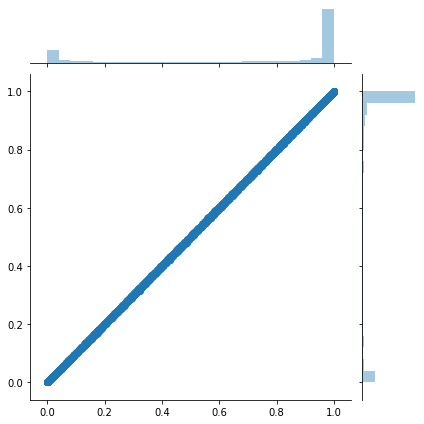

In [157]:
sns.jointplot(y_test,y_rf,kind='scatter')

In [193]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


In [194]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X_data= sc.fit_transform(X_data)
y_data= y_data.reshape(-1,y_data.shape[1])
y_data=sc.fit_transform(y_data)

In [195]:
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

In [196]:
model = Sequential()
model.add(Dense(128, input_dim=in_dim, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")

In [197]:
def build_model(in_dim,out_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=in_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(out_dim)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)

    model.compile(loss='mse',
                    optimizer="adam",
                    metrics=['mae', 'mse'])
    return model

In [198]:
mod = build_model(in_dim,out_dim)
mod.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               1536      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 29)                1885      
Total params: 44,573
Trainable params: 44,573
Non-trainable params: 0
_________________________________________________________________


In [199]:
history = mod.fit(X_train, y_train, epochs=300,validation_split=0.2, verbose=1)

Train on 3600 samples, validate on 900 samples
Epoch 1/300
3600/3600 [==============================] - 1s 188us/sample - loss: 0.0570 - mean_absolute_error: 0.0991 - mean_squared_error: 0.0570 - val_loss: 5.9745e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 5.9745e-04
Epoch 2/300
3600/3600 [==============================] - 0s 129us/sample - loss: 5.5709e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 5.5709e-04 - val_loss: 5.3708e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 5.3708e-04
Epoch 3/300
3600/3600 [==============================] - 0s 113us/sample - loss: 4.9850e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 4.9851e-04 - val_loss: 4.8743e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 4.8743e-04
Epoch 4/300
3600/3600 [==============================] - 0s 112us/sample - loss: 4.4565e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 4.4565e-04 - val_loss: 5.0516e-04 - val_mean_absolute_error: 0.0151 - 

Epoch 34/300
3600/3600 [==============================] - 0s 134us/sample - loss: 9.1515e-05 - mean_absolute_error: 0.0071 - mean_squared_error: 9.1515e-05 - val_loss: 9.1673e-05 - val_mean_absolute_error: 0.0077 - val_mean_squared_error: 9.1673e-05
Epoch 35/300
3600/3600 [==============================] - 0s 132us/sample - loss: 8.7034e-05 - mean_absolute_error: 0.0069 - mean_squared_error: 8.7035e-05 - val_loss: 6.2633e-05 - val_mean_absolute_error: 0.0059 - val_mean_squared_error: 6.2633e-05
Epoch 36/300
3600/3600 [==============================] - 0s 112us/sample - loss: 9.4592e-05 - mean_absolute_error: 0.0073 - mean_squared_error: 9.4592e-05 - val_loss: 7.3565e-05 - val_mean_absolute_error: 0.0067 - val_mean_squared_error: 7.3565e-05
Epoch 37/300
3600/3600 [==============================] - 0s 111us/sample - loss: 7.1829e-05 - mean_absolute_error: 0.0063 - mean_squared_error: 7.1829e-05 - val_loss: 9.5112e-05 - val_mean_absolute_error: 0.0069 - val_mean_squared_error: 9.5112e-05


Epoch 67/300
3600/3600 [==============================] - 0s 110us/sample - loss: 6.6732e-05 - mean_absolute_error: 0.0061 - mean_squared_error: 6.6732e-05 - val_loss: 5.6065e-05 - val_mean_absolute_error: 0.0055 - val_mean_squared_error: 5.6065e-05
Epoch 68/300
3600/3600 [==============================] - 0s 108us/sample - loss: 4.8646e-05 - mean_absolute_error: 0.0051 - mean_squared_error: 4.8646e-05 - val_loss: 6.1712e-05 - val_mean_absolute_error: 0.0061 - val_mean_squared_error: 6.1712e-05
Epoch 69/300
3600/3600 [==============================] - 0s 104us/sample - loss: 7.2393e-05 - mean_absolute_error: 0.0064 - mean_squared_error: 7.2393e-05 - val_loss: 5.6916e-05 - val_mean_absolute_error: 0.0058 - val_mean_squared_error: 5.6916e-05
Epoch 70/300
3600/3600 [==============================] - 0s 105us/sample - loss: 5.5772e-05 - mean_absolute_error: 0.0055 - mean_squared_error: 5.5772e-05 - val_loss: 7.7727e-05 - val_mean_absolute_error: 0.0070 - val_mean_squared_error: 7.7727e-05


Epoch 100/300
3600/3600 [==============================] - 0s 118us/sample - loss: 5.5036e-05 - mean_absolute_error: 0.0055 - mean_squared_error: 5.5036e-05 - val_loss: 3.7047e-05 - val_mean_absolute_error: 0.0044 - val_mean_squared_error: 3.7047e-05
Epoch 101/300
3600/3600 [==============================] - 0s 133us/sample - loss: 4.4231e-05 - mean_absolute_error: 0.0048 - mean_squared_error: 4.4231e-05 - val_loss: 4.7204e-05 - val_mean_absolute_error: 0.0054 - val_mean_squared_error: 4.7204e-05
Epoch 102/300
3600/3600 [==============================] - 0s 127us/sample - loss: 4.2772e-05 - mean_absolute_error: 0.0047 - mean_squared_error: 4.2772e-05 - val_loss: 5.2147e-05 - val_mean_absolute_error: 0.0054 - val_mean_squared_error: 5.2147e-05
Epoch 103/300
3600/3600 [==============================] - 0s 109us/sample - loss: 6.7136e-05 - mean_absolute_error: 0.0059 - mean_squared_error: 6.7136e-05 - val_loss: 5.7398e-05 - val_mean_absolute_error: 0.0058 - val_mean_squared_error: 5.7398e

Epoch 133/300
3600/3600 [==============================] - 0s 109us/sample - loss: 4.5920e-05 - mean_absolute_error: 0.0049 - mean_squared_error: 4.5920e-05 - val_loss: 3.2365e-05 - val_mean_absolute_error: 0.0036 - val_mean_squared_error: 3.2365e-05
Epoch 134/300
3600/3600 [==============================] - 0s 109us/sample - loss: 3.4587e-05 - mean_absolute_error: 0.0041 - mean_squared_error: 3.4587e-05 - val_loss: 3.3199e-05 - val_mean_absolute_error: 0.0041 - val_mean_squared_error: 3.3199e-05
Epoch 135/300
3600/3600 [==============================] - 0s 110us/sample - loss: 4.1067e-05 - mean_absolute_error: 0.0047 - mean_squared_error: 4.1067e-05 - val_loss: 4.7881e-05 - val_mean_absolute_error: 0.0048 - val_mean_squared_error: 4.7881e-05
Epoch 136/300
3600/3600 [==============================] - 0s 110us/sample - loss: 4.5478e-05 - mean_absolute_error: 0.0049 - mean_squared_error: 4.5478e-05 - val_loss: 2.9492e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 2.9492e

Epoch 166/300
3600/3600 [==============================] - 0s 111us/sample - loss: 3.2996e-05 - mean_absolute_error: 0.0039 - mean_squared_error: 3.2996e-05 - val_loss: 3.0407e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 3.0407e-05
Epoch 167/300
3600/3600 [==============================] - 0s 109us/sample - loss: 3.0521e-05 - mean_absolute_error: 0.0038 - mean_squared_error: 3.0521e-05 - val_loss: 2.8986e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 2.8986e-05
Epoch 168/300
3600/3600 [==============================] - 0s 106us/sample - loss: 3.1188e-05 - mean_absolute_error: 0.0038 - mean_squared_error: 3.1188e-05 - val_loss: 2.8385e-05 - val_mean_absolute_error: 0.0034 - val_mean_squared_error: 2.8385e-05
Epoch 169/300
3600/3600 [==============================] - 0s 106us/sample - loss: 2.9721e-05 - mean_absolute_error: 0.0037 - mean_squared_error: 2.9721e-05 - val_loss: 3.5577e-05 - val_mean_absolute_error: 0.0040 - val_mean_squared_error: 3.5577e

Epoch 199/300
3600/3600 [==============================] - 0s 112us/sample - loss: 3.1854e-05 - mean_absolute_error: 0.0039 - mean_squared_error: 3.1854e-05 - val_loss: 2.4946e-05 - val_mean_absolute_error: 0.0033 - val_mean_squared_error: 2.4946e-05
Epoch 200/300
3600/3600 [==============================] - 0s 110us/sample - loss: 3.4912e-05 - mean_absolute_error: 0.0041 - mean_squared_error: 3.4912e-05 - val_loss: 2.3674e-05 - val_mean_absolute_error: 0.0031 - val_mean_squared_error: 2.3674e-05
Epoch 201/300
3600/3600 [==============================] - 0s 110us/sample - loss: 3.7074e-05 - mean_absolute_error: 0.0043 - mean_squared_error: 3.7074e-05 - val_loss: 3.5604e-05 - val_mean_absolute_error: 0.0043 - val_mean_squared_error: 3.5604e-05
Epoch 202/300
3600/3600 [==============================] - 0s 109us/sample - loss: 3.6501e-05 - mean_absolute_error: 0.0043 - mean_squared_error: 3.6501e-05 - val_loss: 3.1674e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 3.1674e

Epoch 232/300
3600/3600 [==============================] - 0s 109us/sample - loss: 3.1580e-05 - mean_absolute_error: 0.0039 - mean_squared_error: 3.1580e-05 - val_loss: 2.8801e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 2.8801e-05
Epoch 233/300
3600/3600 [==============================] - 0s 111us/sample - loss: 2.9053e-05 - mean_absolute_error: 0.0037 - mean_squared_error: 2.9053e-05 - val_loss: 2.4233e-05 - val_mean_absolute_error: 0.0034 - val_mean_squared_error: 2.4233e-05
Epoch 234/300
3600/3600 [==============================] - 0s 110us/sample - loss: 3.1580e-05 - mean_absolute_error: 0.0039 - mean_squared_error: 3.1580e-05 - val_loss: 2.7065e-05 - val_mean_absolute_error: 0.0037 - val_mean_squared_error: 2.7065e-05
Epoch 235/300
3600/3600 [==============================] - 0s 108us/sample - loss: 2.8078e-05 - mean_absolute_error: 0.0036 - mean_squared_error: 2.8078e-05 - val_loss: 2.6629e-05 - val_mean_absolute_error: 0.0036 - val_mean_squared_error: 2.6629e

Epoch 265/300
3600/3600 [==============================] - 0s 109us/sample - loss: 2.6357e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 2.6357e-05 - val_loss: 2.1127e-05 - val_mean_absolute_error: 0.0029 - val_mean_squared_error: 2.1127e-05
Epoch 266/300
3600/3600 [==============================] - 0s 113us/sample - loss: 2.7107e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 2.7107e-05 - val_loss: 3.0496e-05 - val_mean_absolute_error: 0.0039 - val_mean_squared_error: 3.0496e-05
Epoch 267/300
3600/3600 [==============================] - 0s 110us/sample - loss: 3.4022e-05 - mean_absolute_error: 0.0041 - mean_squared_error: 3.4022e-05 - val_loss: 3.0062e-05 - val_mean_absolute_error: 0.0034 - val_mean_squared_error: 3.0062e-05
Epoch 268/300
3600/3600 [==============================] - 0s 110us/sample - loss: 2.8231e-05 - mean_absolute_error: 0.0037 - mean_squared_error: 2.8231e-05 - val_loss: 2.3967e-05 - val_mean_absolute_error: 0.0030 - val_mean_squared_error: 2.3967e

Epoch 298/300
3600/3600 [==============================] - 0s 109us/sample - loss: 2.8271e-05 - mean_absolute_error: 0.0036 - mean_squared_error: 2.8271e-05 - val_loss: 2.8076e-05 - val_mean_absolute_error: 0.0034 - val_mean_squared_error: 2.8076e-05
Epoch 299/300
3600/3600 [==============================] - 0s 109us/sample - loss: 2.7757e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 2.7757e-05 - val_loss: 2.9865e-05 - val_mean_absolute_error: 0.0035 - val_mean_squared_error: 2.9865e-05
Epoch 300/300
3600/3600 [==============================] - 0s 108us/sample - loss: 2.6982e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 2.6982e-05 - val_loss: 2.5358e-05 - val_mean_absolute_error: 0.0035 - val_mean_squared_error: 2.5358e-05


In [200]:
y_pred = mod.predict(X_test)

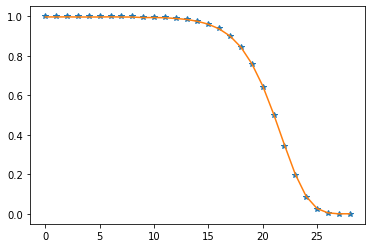

In [201]:
plt.plot(np.arange(y_data.shape[1]),y_test[10,:],'*')
plt.plot(np.arange(y_data.shape[1]),y_pred[10])

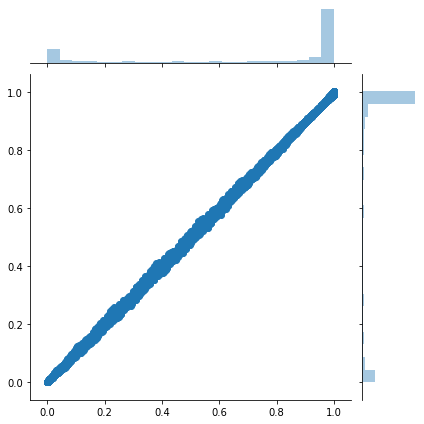

In [202]:
sns.jointplot(y_test,y_pred)